# import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Data Preprocessing

In [2]:
pd.set_option("display.max_columns" , None)
data = pd.read_csv(r"C:\Users\ma516\OneDrive\Desktop\Machine Learning Projects\Telecom Customer Churn App\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

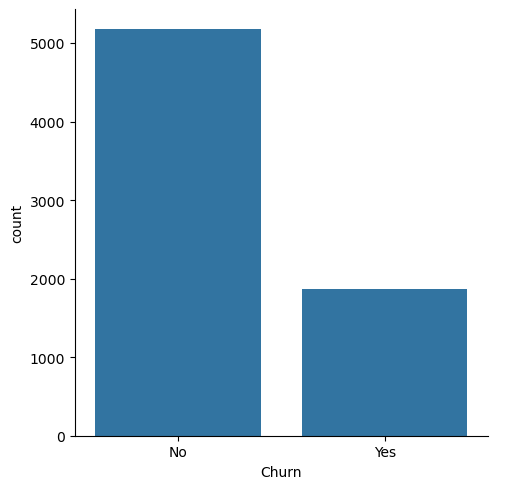

In [5]:
sns.catplot(x = "Churn"  , data= data  , kind="count" )
plt.show()

In [6]:
x = data.drop(columns=["customerID" , "gender" , "MultipleLines" ,"Churn"])
y = data["Churn"]

In [7]:
x.shape

(7043, 17)

In [8]:
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


# Encode Our Data

In [10]:
LE = LabelEncoder()

In [12]:
for col in x.columns:
    x[col] = LE.fit_transform(x[col])
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,2,0,0,0,0,0,1,2,142,2505
1,0,0,0,34,1,0,2,0,2,0,0,0,1,0,3,498,1466
2,0,0,0,2,1,0,2,2,0,0,0,0,0,1,3,436,157
3,0,0,0,45,0,0,2,0,2,2,0,0,1,0,0,266,1400
4,0,0,0,2,1,1,0,0,0,0,0,0,0,1,2,729,925


In [19]:
y = LE.fit_transform(y)
print(y)

[0 0 1 ... 0 1 0]


# Trained Our Data

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=2, test_size=0.2)

In [37]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(5634, 17) (1409, 17) (5634,) (1409,)


In [39]:
lasso = LassoCV(alphas=np.logspace(-3, 2, 50), cv=5, random_state=42)
lasso.fit(x_train, y_train)

print("Best alpha:", lasso.alpha_)
print("Training R^2:", lasso.score(x_train, y_train))
print("Test R^2:", lasso.score(x_test, y_test))

Best alpha: 0.0012648552168552957
Training R^2: 0.2715138931219909
Test R^2: 0.2460871135739615


In [41]:
Elastic = ElasticNetCV(alphas=np.logspace(-3, 2, 50), cv=5, random_state=42)
Elastic.fit(x_train, y_train)

print("Best alpha:", lasso.alpha_)
print("Training R^2:", lasso.score(x_train, y_train))
print("Test R^2:", lasso.score(x_test, y_test))

Best alpha: 0.0012648552168552957
Training R^2: 0.2715138931219909
Test R^2: 0.2460871135739615


In [44]:
Ridge = RidgeCV(alphas=np.logspace(-3, 2, 50), cv=5)
Ridge.fit(x_train, y_train)

print("Best alpha:", lasso.alpha_)
print("Training R^2:", lasso.score(x_train, y_train))
print("Test R^2:", lasso.score(x_test, y_test))

Best alpha: 0.0012648552168552957
Training R^2: 0.2715138931219909
Test R^2: 0.2460871135739615


# Note : It show a very low score by using LassoCV , ElasticNetCV and RidgeCV